In [114]:
library(samplingbook)

In [115]:
df <- read.csv("saber11.csv", header = TRUE)

In [116]:
Sys.setlocale('LC_ALL','C')

[1] "LC_CTYPE=C;LC_NUMERIC=C;LC_TIME=C;LC_COLLATE=C;LC_MONETARY=C;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_CO.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_CO.UTF-8;LC_IDENTIFICATION=C"

In [117]:
head(df)

,X,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,M,VALLE,Estrato 1,ACADMICO,URBANO,NOCHE,32,34,36,41,33,178
2,2,F,MAGDALENA,Estrato 1,TCNICO/ACADMICO,URBANO,MAANA,54,51,50,44,53,250
3,3,M,CALDAS,Estrato 1,TCNICO/ACADMICO,URBANO,NOCHE,42,43,38,48,40,213
4,4,M,SANTANDER,Estrato 1,ACADMICO,RURAL,MAANA,63,59,62,54,52,295
5,5,M,MAGDALENA,Estrato 1,TCNICO/ACADMICO,URBANO,MAANA,34,58,44,32,50,213
6,6,M,ATLANTICO,Estrato 1,TCNICO/ACADMICO,URBANO,UNICA,65,53,56,52,62,285


In [118]:
df[df$FAMI_ESTRATOVIVIENDA == "Sin estrato",]

X,ESTU_GENERO,ESTU_DEPTO_RESIDE,FAMI_ESTRATOVIVIENDA,COLE_CARACTER,COLE_AREA_UBICACION,COLE_JORNADA,PUNT_LECTURA_CRITICA,PUNT_MATEMATICAS,PUNT_C_NATURALES,PUNT_SOCIALES_CIUDADANAS,PUNT_INGLES,PUNT_GLOBAL
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>


In [119]:
sample.size.mean(e=6, N=nrow(df), level=0.95, S=50)


sample.size.mean object: Sample size for mean estimate
With finite population correction: N=4861, precision e=6 and standard deviation S=50

Sample size needed: 253


In [120]:
nh = as.vector(table(df$FAMI_ESTRATOVIVIENDA))


In [121]:
stratasamp(n=253,Nh=nh)

,,,,,,
Stratum,1,2,3,4,5,6
Size,87,96,53,12,4,2


In [122]:
shapiro.test(df$PUNT_GLOBAL)


	Shapiro-Wilk normality test

data:  df$PUNT_GLOBAL
W = 0.98866, p-value < 2.2e-16


In [123]:
t.test(df$PUNT_GLOBAL, mu = 250, alternative = "less", conf.level = 0.95)


	One Sample t-test

data:  df$PUNT_GLOBAL
t = 6.9146, df = 4860, p-value = 1
alternative hypothesis: true mean is less than 250
95 percent confidence interval:
     -Inf 256.0908
sample estimates:
mean of x 
 254.9202 


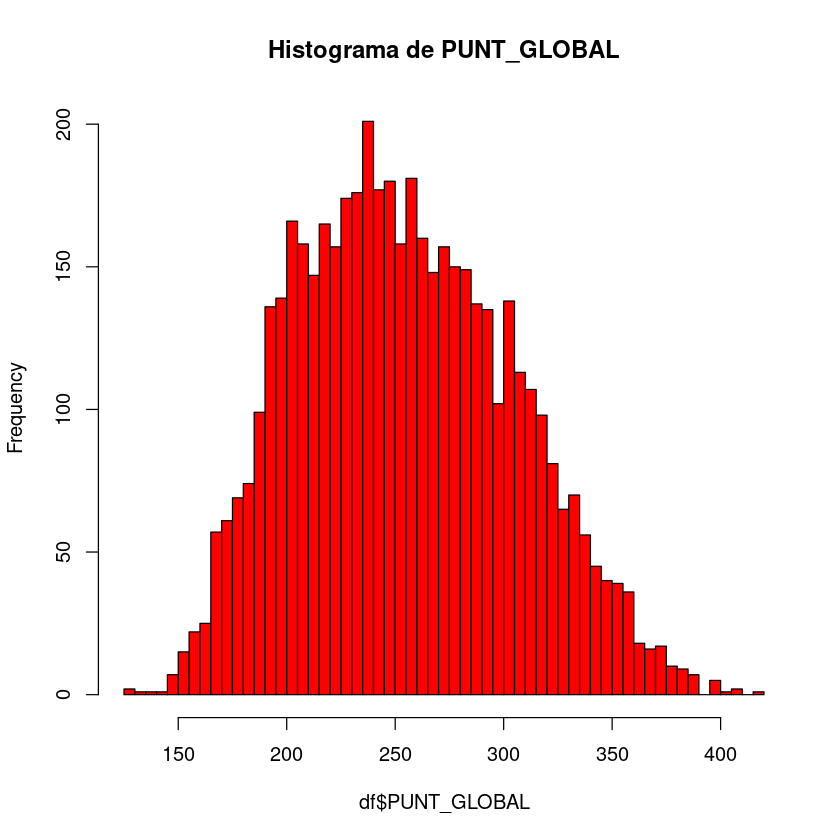

In [124]:
hist(df$PUNT_GLOBAL, breaks=100, col="red", main="Histograma de PUNT_GLOBAL")

In [125]:
df_f <- df[df$ESTU_GENERO == "F",]
df_m <- df[df$ESTU_GENERO == "M",]

In [126]:
shapiro.test(df_f$PUNT_GLOBAL)
shapiro.test(df_m$PUNT_GLOBAL)


	Shapiro-Wilk normality test

data:  df_f$PUNT_GLOBAL
W = 0.98663, p-value = 3.423e-15



	Shapiro-Wilk normality test

data:  df_m$PUNT_GLOBAL
W = 0.99078, p-value = 1.441e-10


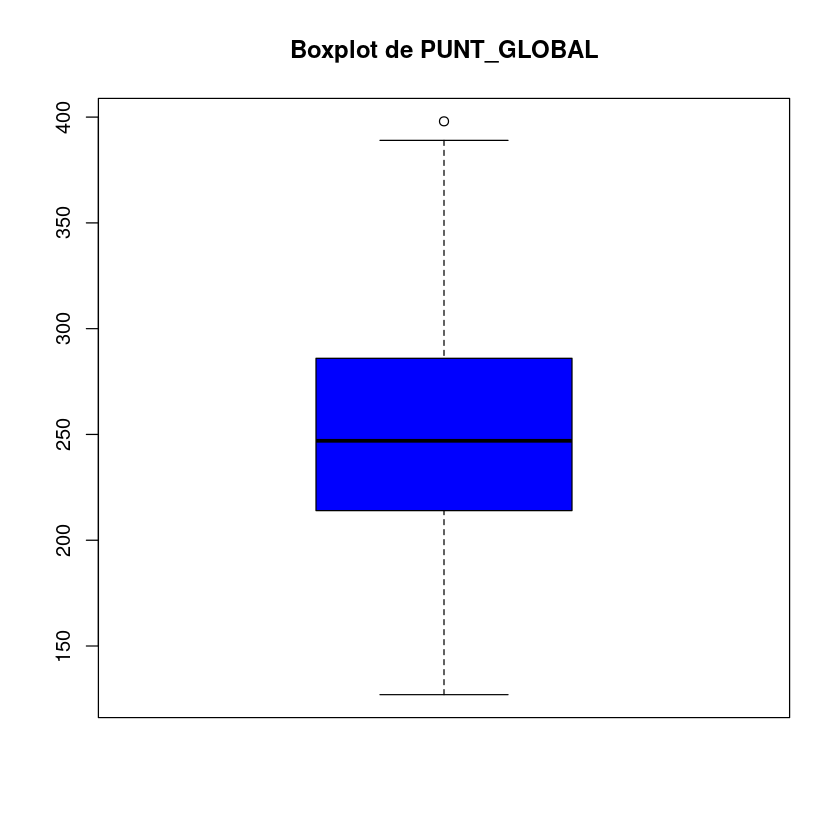

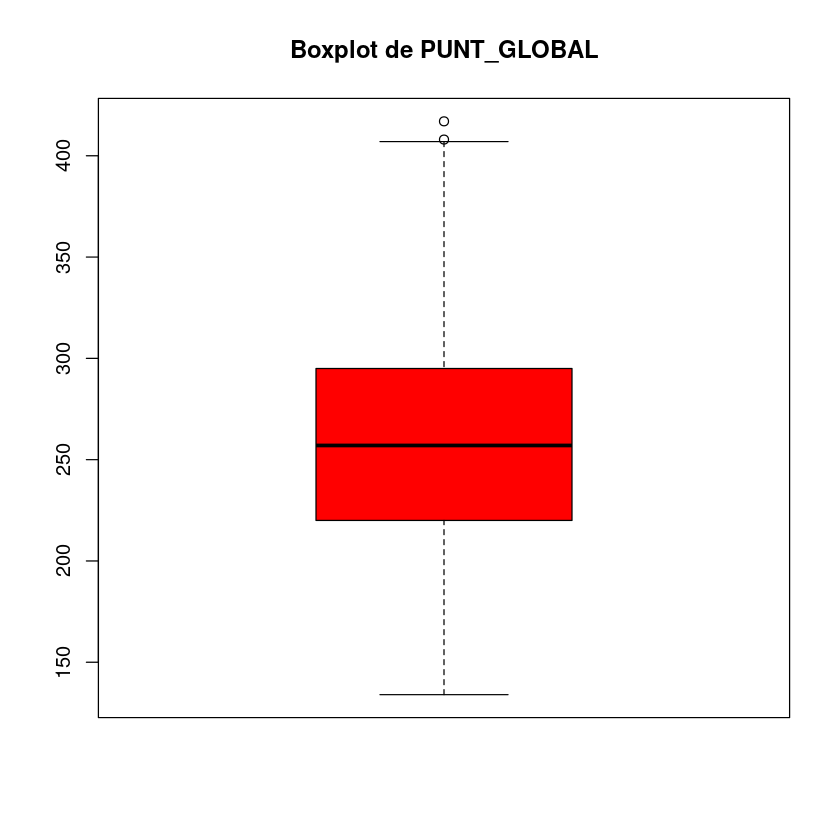

In [127]:
boxplot(df_f$PUNT_GLOBAL, col="blue", main="Boxplot de PUNT_GLOBAL")
boxplot(df_m$PUNT_GLOBAL, col="red", main="Boxplot de PUNT_GLOBAL")

In [128]:
var.test(df_f$PUNT_GLOBAL, df_m$PUNT_GLOBAL)


	F test to compare two variances

data:  df_f$PUNT_GLOBAL and df_m$PUNT_GLOBAL
F = 0.91274, num df = 2679, denom df = 2180, p-value = 0.02492
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.8424503 0.9885647
sample estimates:
ratio of variances 
         0.9127398 


no se cumple supuesto de normalidad, se tiene valores atipicos y no se cumple con varianza

In [129]:
t.test(df_f$PUNT_GLOBAL, df_m$PUNT_GLOBAL, var.equal = FALSE, alternative = "two.sided", conf.level = 0.95)


	Welch Two Sample t-test

data:  df_f$PUNT_GLOBAL and df_m$PUNT_GLOBAL
t = -4.9741, df = 4569.7, p-value = 6.797e-07
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9.943306 -4.321118
sample estimates:
mean of x mean of y 
 251.7201  258.8524 


In [130]:
t.test(df_f$PUNT_GLOBAL, df_m$PUNT_GLOBAL, var.equal = FALSE, alternative = "less", conf.level = 0.95)


	Welch Two Sample t-test

data:  df_f$PUNT_GLOBAL and df_m$PUNT_GLOBAL
t = -4.9741, df = 4569.7, p-value = 3.398e-07
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
      -Inf -4.773214
sample estimates:
mean of x mean of y 
 251.7201  258.8524 


el puntaje de los hombres es superior al de las mujeres

In [131]:
df_est1 <- df[df$FAMI_ESTRATOVIVIENDA == "Estrato 1",]
df_est2 <- df[df$FAMI_ESTRATOVIVIENDA == "Estrato 2",]

In [132]:
shapiro.test(df_est1$PUNT_GLOBAL)
shapiro.test(df_est2$PUNT_GLOBAL)


	Shapiro-Wilk normality test

data:  df_est1$PUNT_GLOBAL
W = 0.98621, p-value = 1.551e-11



	Shapiro-Wilk normality test

data:  df_est2$PUNT_GLOBAL
W = 0.98931, p-value = 2.053e-10


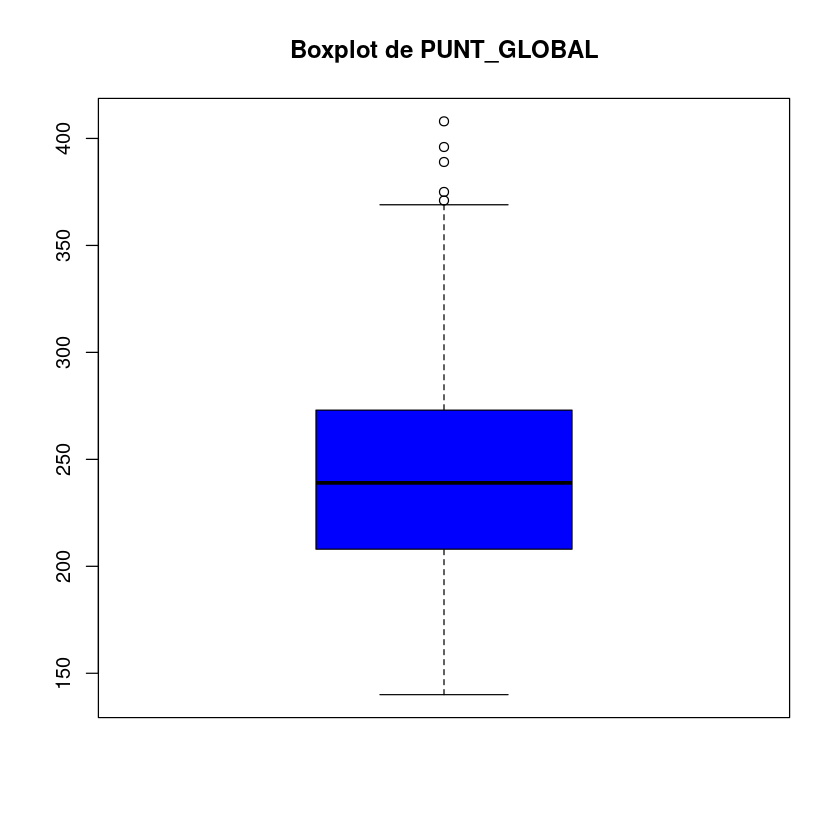

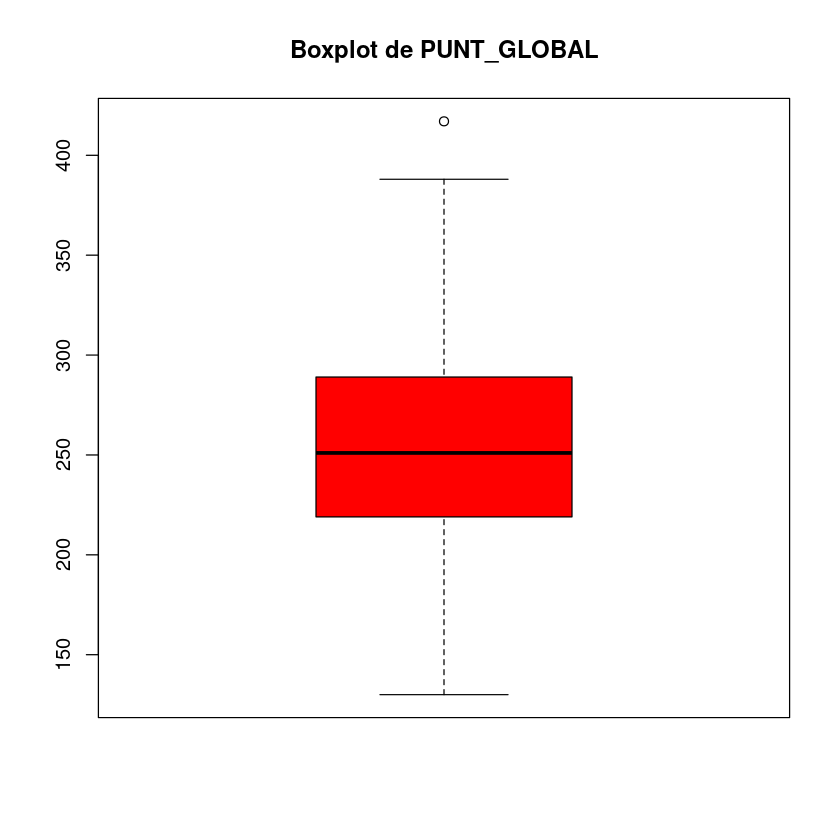

In [133]:
boxplot(df_est1$PUNT_GLOBAL, col="blue", main="Boxplot de PUNT_GLOBAL")
boxplot(df_est2$PUNT_GLOBAL, col="red", main="Boxplot de PUNT_GLOBAL")

In [134]:
var.test(df_est1$PUNT_GLOBAL, df_est2$PUNT_GLOBAL)


	F test to compare two variances

data:  df_est1$PUNT_GLOBAL and df_est2$PUNT_GLOBAL
F = 0.87784, num df = 1666, denom df = 1840, p-value = 0.006544
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7993514 0.9642407
sample estimates:
ratio of variances 
         0.8778364 


no se cumple supuesto de normalidad, se tiene valores atipicos y no se cumple con varianza

In [135]:
t.test(df_est1$PUNT_GLOBAL, df_est2$PUNT_GLOBAL, var.equal = FALSE, alternative = "two.sided", conf.level = 0.95)


	Welch Two Sample t-test

data:  df_est1$PUNT_GLOBAL and df_est2$PUNT_GLOBAL
t = -7.9964, df = 3501.9, p-value = 1.725e-15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -15.424954  -9.350282
sample estimates:
mean of x mean of y 
 242.4103  254.7979 


In [136]:
t.test(df_est1$PUNT_GLOBAL, df_est2$PUNT_GLOBAL, var.equal = FALSE, alternative = "greater", conf.level = 0.95)


	Welch Two Sample t-test

data:  df_est1$PUNT_GLOBAL and df_est2$PUNT_GLOBAL
t = -7.9964, df = 3501.9, p-value = 1
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 -14.93642       Inf
sample estimates:
mean of x mean of y 
 242.4103  254.7979 


las personas de estrato 2 tienen mayor puntaje a personas de estrato 1

In [137]:
tab_jor_estrt <- table(df$COLE_JORNADA, df$FAMI_ESTRATOVIVIENDA)
tab_jor_estrt

           
            Estrato 1 Estrato 2 Estrato 3 Estrato 4 Estrato 5 Estrato 6
  COMPLETA        171       310       298       102        31        16
  MA\321ANA       964       938       457        97        25        13
  NOCHE            90        97        45         9         3         1
  SABATINA        111        85        26         5         3         2
  TARDE           204       253       117        11         4         2
  UNICA           127       158        72         7         7         0

In [138]:
chisq <- chisq.test(tab_jor_estrt)

Warning message in chisq.test(tab_jor_estrt):
"Chi-squared approximation may be incorrect"


In [139]:
chisq$observed

           
            Estrato 1 Estrato 2 Estrato 3 Estrato 4 Estrato 5 Estrato 6
  COMPLETA        171       310       298       102        31        16
  MA\321ANA       964       938       457        97        25        13
  NOCHE            90        97        45         9         3         1
  SABATINA        111        85        26         5         3         2
  TARDE           204       253       117        11         4         2
  UNICA           127       158        72         7         7         0

In [140]:
round(chisq$expected,2)

,Estrato 1,Estrato 2,Estrato 3,Estrato 4,Estrato 5,Estrato 6
COMPLETA,318.24,351.46,193.77,44.10,13.94,6.49
MAANA,855.28,944.55,520.76,118.52,37.45,17.44
NOCHE,84.02,92.79,51.16,11.64,3.68,1.71
SABATINA,79.56,87.87,48.44,11.02,3.48,1.62
TARDE,202.67,223.83,123.40,28.08,8.88,4.13
UNICA,127.23,140.51,77.47,17.63,5.57,2.59


In [113]:
round(chisq$stdres,2)

           
            Estrato 1 Estrato 2 Estrato 3 Estrato 4 Estrato 5 Estrato 6
  COMPLETA     -11.32     -3.12      9.36      9.93      5.12      4.16
  MA\321ANA      6.57     -0.39     -4.50     -2.90     -2.94     -1.53
  NOCHE          0.83      0.57     -0.99     -0.81     -0.37     -0.56
  SABATINA       4.46     -0.40     -3.71     -1.91     -0.27      0.30
  TARDE          0.12      2.64     -0.69     -3.52     -1.76     -1.12
  UNICA         -0.03      1.95     -0.73     -2.70      0.63     -1.68

hay una gran asociacion entre estrato y tipo de jornada, mientras las personas de estrato 1 tienen una mayor asociacion con tipo de jornada solo mañana o sabatina, las personas de estrato 3 y superior tienen una mayor asociacion con tipo de jornada completa